In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
path = '/export/data1/brodriguez/'

## Pipe3D data cube for UGC12250

In [82]:
hdu_list = fits.open(path+'UGC12250.Pipe3D.cube.fits')

In [5]:
hdu_list.info()

Filename: /export/data1/brodriguez/UGC12250.Pipe3D.cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  ORG_HDR       1 PrimaryHDU     515   ()      
  1  SSP           1 ImageHDU       118   (160, 149, 21)   float64   
  2  SFH           1 ImageHDU      1608   (160, 149, 319)   float64   
  3  INDICES       1 ImageHDU        79   (160, 149, 70)   float64   
  4  ELINES        1 ImageHDU        68   (160, 149, 11)   float64   
  5  FLUX_ELINES    1 ImageHDU      1310   (160, 149, 432)   float64   
  6  FLUX_ELINES_LONG    1 ImageHDU      3134   (160, 149, 1040)   float64   
  7  GAIA_MASK     1 ImageHDU        10   (160, 149)   float64   
  8  SELECT_REG    1 ImageHDU        10   (160, 149)   int64   


In [13]:
hdu_list[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
NAXIS3  =                   21                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyPipe3D v2.0.0b'                                                    
UNIXTIME=           1661999002 / 2022-08-31 21:23:22.937460                     
OBJECT  = 'UGC12250'                                                            
ID_0    =                    1                                                  
FILE_0  = 'UGC12250.V.fits.g

In [21]:
ssp = hdu_list[1].data

In [107]:
for i in range(len(ssp)):
    ssp[i][region<1] = np.nan

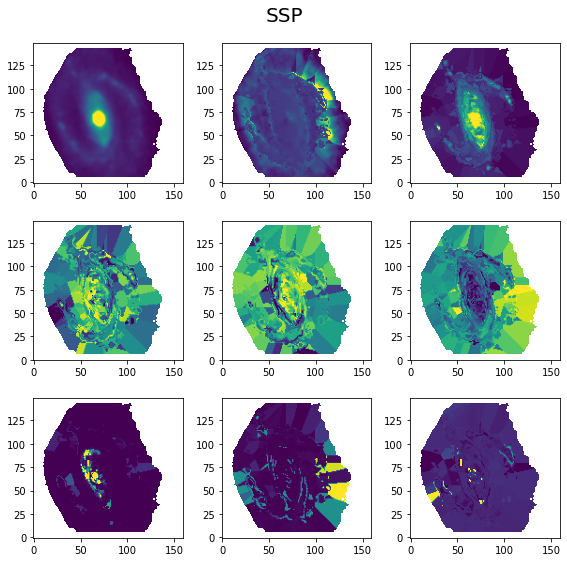

In [114]:
nspec, ny, nx = ssp.shape
step = int(np.floor(nspec/9))
fig, axs = plt.subplots(3,3,figsize=(8,8))
for i, ax in zip(np.arange(0,nspec,2),axs.ravel()):
    data = ssp[i,:,:]
    vmin = np.nanpercentile(data,2)
    vmax = np.nanpercentile(data,99)
    ax.imshow(data,origin='lower',vmin=vmin,vmax=vmax)
fig.suptitle('SSP',size=20)
fig.tight_layout()
plt.show()

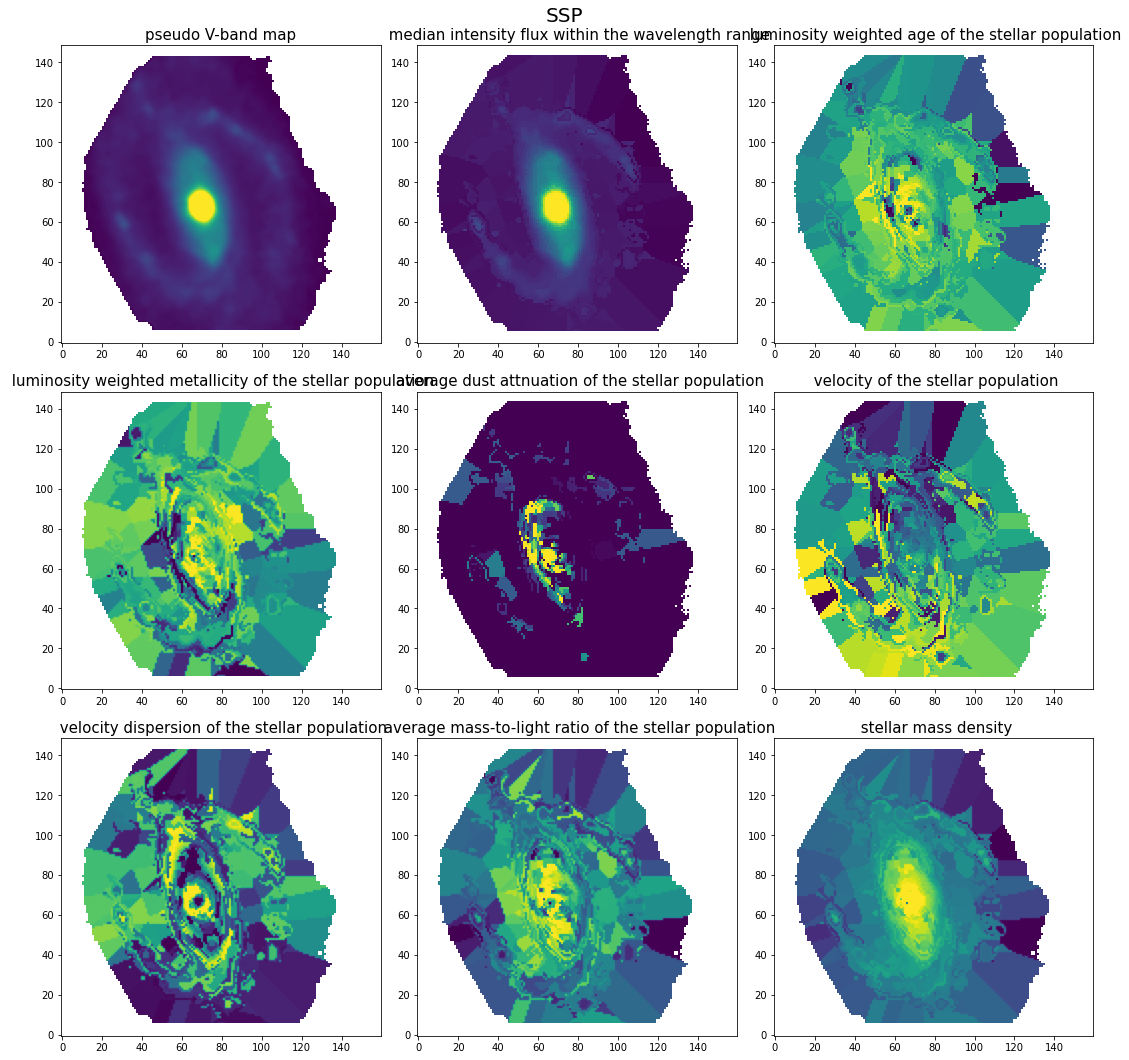

In [116]:
frames = [0,3,5,8,11,13,15,17,18]
fig, axs = plt.subplots(3,3,figsize=(15,15))
for i, ax in zip(frames,axs.ravel()):
    data = ssp[i,:,:]
    vmin = np.nanpercentile(data,2)
    vmax = np.nanpercentile(data,99)
    ax.imshow(data,origin='lower',vmin=vmin,vmax=vmax)
    ax.set_title(hdu_list[1].header[f'DESC_{i}'],size=15)
fig.suptitle('SSP',size=20)
fig.tight_layout()
plt.show()

In [83]:
hdu_list[2].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
NAXIS3  =                  319                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyPipe3D v2.0.0b'                                                    
UNIXTIME=           1661999013 / 2022-08-31 21:23:33.057979                     
OBJECT  = 'UGC12250'                                                            
ID_0    =                    1                                                  
FILE_0  = 'map.CS.UGC12250_N

In [47]:
sfh = hdu_list[2].data

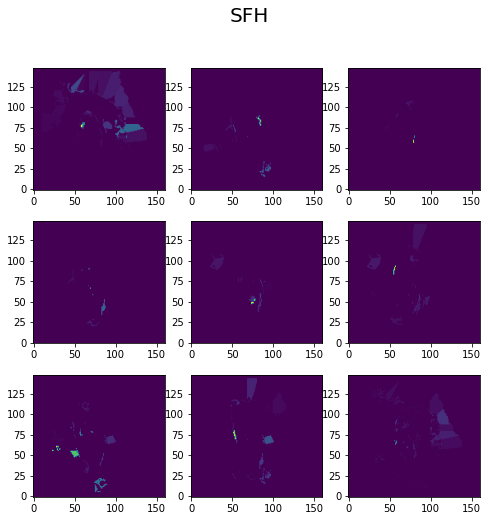

In [51]:
nspec, ny, nx = sfh.shape
step = int(np.floor(nspec/9))
fig, axs = plt.subplots(3,3,figsize=(8,8))
for i, ax in zip(np.arange(0,nspec,step),axs.ravel()):
    ax.imshow(sfh[i,:,:],origin='lower')
fig.suptitle('SFH',size=20)
plt.show()

In [84]:
hdu_list[3].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
NAXIS3  =                   70                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INDEX0  = 'D4000   '                                                            
INDEX35 = 'e_D4000 '                                                            
INDEX1  = 'CN1     '                                                            
INDEX36 = 'CN1     '                                                            
INDEX2  = 'CN2     '        

In [54]:
indices = hdu_list[3].data

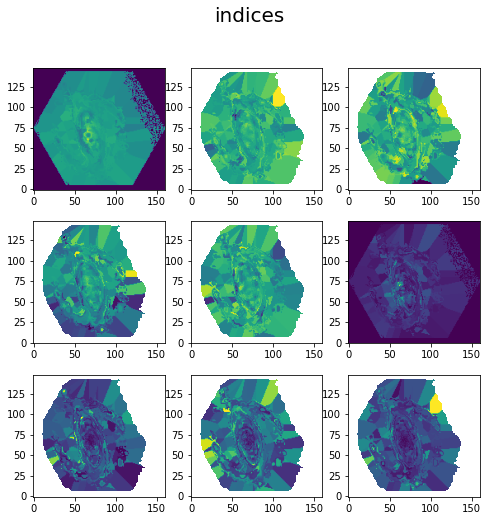

In [58]:
nspec, ny, nx = indices.shape
step = int(np.floor(nspec/9))
fig, axs = plt.subplots(3,3,figsize=(8,8))
for i, ax in zip(np.arange(0,nspec,step),axs.ravel()):
    ax.imshow(indices[i,:,:],origin='lower')
fig.suptitle('indices',size=20)
plt.show()

In [85]:
hdu_list[4].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
NAXIS3  =                   11                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyPipe3D v2.0.0b'                                                    
UNIXTIME=           1661999003 / 2022-08-31 21:23:23.358814                     
OBJECT  = 'UGC12250'                                                            
ID_0    =                    1                                                  
FILE_0  = 'map.6530_6630.UGC

In [55]:
elines = hdu_list[4].data

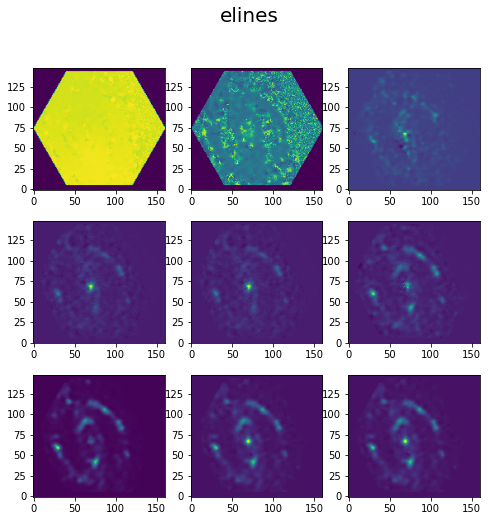

In [59]:
nspec, ny, nx = elines.shape
step = int(np.floor(nspec/9))
fig, axs = plt.subplots(3,3,figsize=(8,8))
for i, ax in zip(np.arange(0,nspec,step),axs.ravel()):
    ax.imshow(elines[i,:,:],origin='lower')
fig.suptitle('elines',size=20)
plt.show()

In [86]:
hdu_list[5].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
NAXIS3  =                  432                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CDELT3  =                  2.0                                                  
CRPIX3  =                  1.0                                                  
CRVAL3  =               3749.0                                                  
NAME0   = 'flux [OII]3727'                                                      
NAME1   = 'flux H12'        

In [56]:
f_elines = hdu_list[5].data

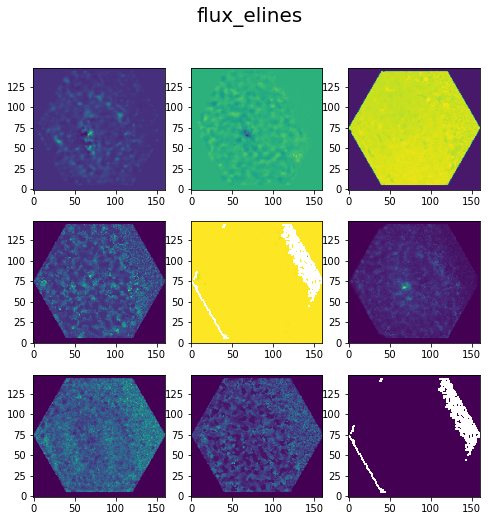

In [60]:
nspec, ny, nx = f_elines.shape
step = int(np.floor(nspec/9))
fig, axs = plt.subplots(3,3,figsize=(8,8))
for i, ax in zip(np.arange(0,nspec,step),axs.ravel()):
    ax.imshow(f_elines[i,:,:],origin='lower')
fig.suptitle('flux_elines',size=20)
plt.show()

In [87]:
hdu_list[6].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
NAXIS3  =                 1040                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
CDELT3  =                  2.0                                                  
CRPIX3  =                  1.0                                                  
CRVAL3  =               3749.0                                                  
NAME0   = 'flux [OII]'                                                          
NAME1   = 'flux [OII]'      

In [57]:
f_elines_long = hdu_list[6].data

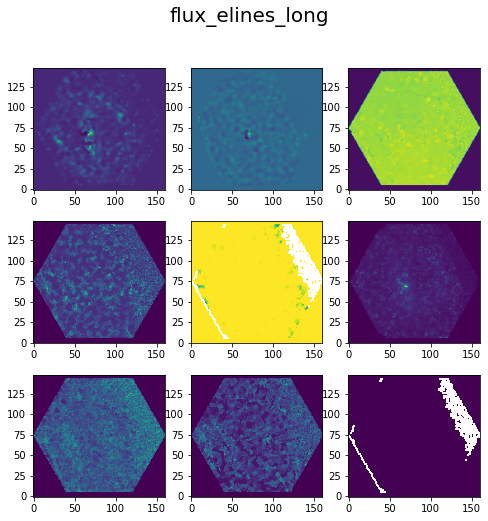

In [61]:
nspec, ny, nx = f_elines_long.shape
step = int(np.floor(nspec/9))
fig, axs = plt.subplots(3,3,figsize=(8,8))
for i, ax in zip(np.arange(0,nspec,step),axs.ravel()):
    ax.imshow(f_elines_long[i,:,:],origin='lower')
fig.suptitle('flux_elines_long',size=20)
plt.show()

In [88]:
hdu_list[7].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyPipe3D v2.0.0b'                                                    
UNIXTIME=           1661937000 / 2022-08-31 04:10:00.803822                     
EXTNAME = 'GAIA_MASK'          / extension name                                 

In [15]:
mask = hdu_list[7].data

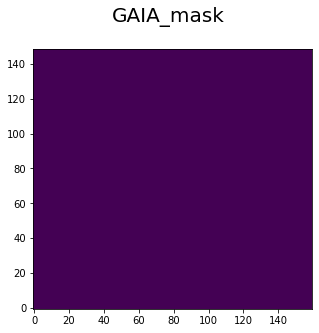

In [63]:
fig, axs = plt.subplots(figsize=(5,5))
axs.imshow(mask,origin='lower')
fig.suptitle('GAIA_mask',size=20)
plt.show()

In [89]:
hdu_list[8].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  160                                                  
NAXIS2  =                  149                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyPipe3D v2.0.0b'                                                    
UNIXTIME=           1661938008 / 2022-08-31 04:26:48.272077                     
EXTNAME = 'SELECT_REG'         / extension name                                 

In [52]:
region = hdu_list[8].data

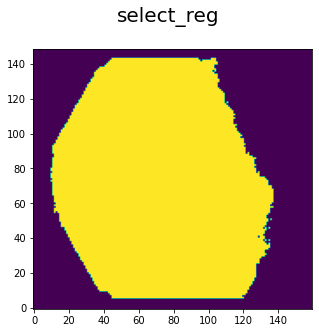

In [64]:
fig, axs = plt.subplots(figsize=(5,5))
axs.imshow(region,origin='lower')
fig.suptitle('select_reg',size=20)
plt.show()

In [117]:
hdu_list.close()

## CO(2-1) data cube for UGC12250

In [3]:
hdu_list = fits.open(path+'UGC12250_7m_co21_pbcor.fits')

In [69]:
hdu_list.info()

Filename: /export/data1/brodriguez/UGC12250_7m_co21_pbcor.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   (120, 120, 197)   float32   


In [70]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  120                                                  
NAXIS2  =                  120                                                  
NAXIS3  =                  197                                                  
BMAJ    =   2.623496323459E-03                                                  
BMIN    =   1.505816915164E-03                                                  
BPA     =  -3.571292199102E+01                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'UGC12250'                                                            
BUNIT   = 'beam-1 Jy'          / Brightness (pixel) unit                        
ALTRVAL =   2.246830823985E+

In [4]:
CO_map = hdu_list[0].data

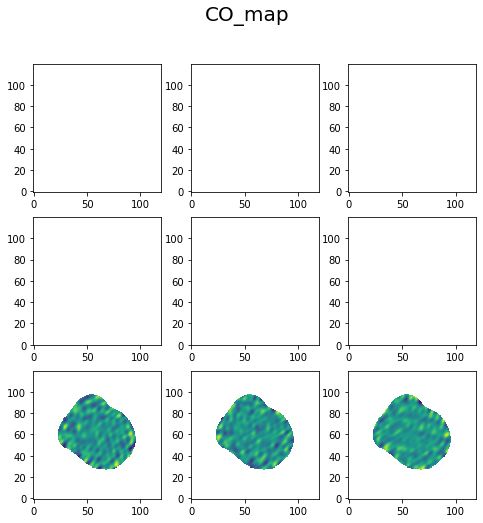

In [72]:
nspec, ny, nx = CO_map.shape
step = int(np.floor(nspec/9))
fig, axs = plt.subplots(3,3,figsize=(8,8))
for i, ax in zip(np.arange(0,nspec,step),axs.ravel()):
    ax.imshow(CO_map[i,:,:],origin='lower')
fig.suptitle('CO_map',size=20)
plt.show()

In [73]:
CO_map.shape

(197, 120, 120)

In [74]:
step

21

In [5]:
integrated_CO = np.nansum(CO_map,axis=0)
integrated_CO.shape

(120, 120)

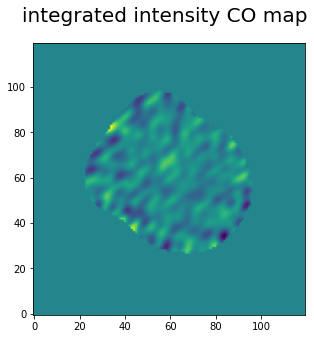

In [14]:
fig, axs = plt.subplots(figsize=(5,5))
axs.imshow(integrated_CO,origin='lower')
fig.suptitle('integrated intensity CO map',size=20)
plt.show()

In [7]:
median_CO = np.nanmedian(CO_map,axis=0)
median_CO.shape

/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


(120, 120)

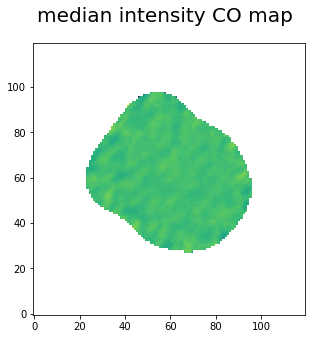

In [15]:
fig, axs = plt.subplots(figsize=(5,5))
axs.imshow(median_CO,origin='lower')
fig.suptitle('median intensity CO map',size=20)
plt.show()

In [9]:
mean_CO = np.nanmean(CO_map,axis=0)
mean_CO.shape

/tmp/ipykernel_1924584/4252381281.py:1: RuntimeWarning: Mean of empty slice
  mean_CO = np.nanmean(CO_map,axis=0)


(120, 120)

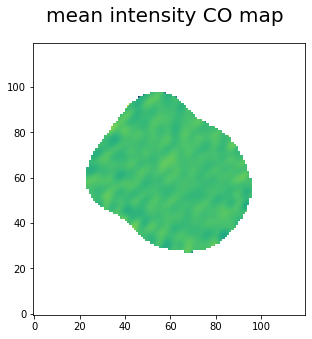

In [16]:
fig, axs = plt.subplots(figsize=(5,5))
axs.imshow(mean_CO,origin='lower')
fig.suptitle('mean intensity CO map',size=20)
plt.show()

In [11]:
max_CO = np.nanmax(CO_map,axis=0)
max_CO.shape

/tmp/ipykernel_1924584/429357585.py:1: RuntimeWarning: All-NaN slice encountered
  max_CO = np.nanmax(CO_map,axis=0)


(120, 120)

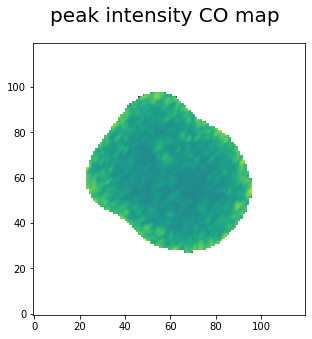

In [17]:
fig, axs = plt.subplots(figsize=(5,5))
axs.imshow(max_CO,origin='lower')
fig.suptitle('peak intensity CO map',size=20)
plt.show()

In [13]:
hdu_list.close()